In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Load the data
df = pd.read_csv('education_expenditure.csv')

In [9]:
df.head()

,Country,Year,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%)
0,Afghanistan,2010,6.40,3.48
1,Afghanistan,2011,5.15,3.46
2,Afghanistan,2012,6.49,2.60
3,Afghanistan,2013,7.13,3.45
4,Afghanistan,2014,7.96,3.70


In [10]:
df['Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

In [11]:
df.columns

Index(['Country', 'Year',
       'Expenditure on education as a percentage of total government expenditure (%)',
       'Government expenditure on education as a percentage of GDP (%)'],
      dtype='object')

In [12]:
# Features and target
X = df.drop(columns=['Expenditure on education as a percentage of total government expenditure (%)',
       'Government expenditure on education as a percentage of GDP (%)'])
y = df['Government expenditure on education as a percentage of GDP (%)']

In [13]:
df['Country'].nunique()

197

In [14]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[['Country']])

X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Country']))
X_numerical = X.drop(columns=['Country'])
X_processed = pd.concat([X_numerical, X_encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Linear Regression Model
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_lr = model_lr.predict(X_train_scaled)
y_pred_test_lr = model_lr.predict(X_test_scaled)

# Evaluation
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_rf = rf_model.predict(X_train_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

# Evaluation
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_dt = dt_model.predict(X_train_scaled)
y_pred_test_dt = dt_model.predict(X_test_scaled)

# Evaluation
mse_train_dt = mean_squared_error(y_train, y_pred_train_dt)
mse_test_dt = mean_squared_error(y_test, y_pred_test_dt)
r2_train_dt = r2_score(y_train, y_pred_train_dt)
r2_test_dt = r2_score(y_test, y_pred_test_dt)

# XGBoost Model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_xgb = xgb_model.predict(X_train_scaled)
y_pred_test_xgb = xgb_model.predict(X_test_scaled)

# Evaluation
mse_train_xgb = mean_squared_error(y_train, y_pred_train_xgb)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

data = {
    'Model': ['Linear Regression', 'Random Forest', 'Decision Tree', 'XGBoost'],
    'Training MSE': [mse_train_lr, mse_train_rf, mse_train_dt, mse_train_xgb],
    'Testing MSE': [mse_test_lr, mse_test_rf, mse_test_dt, mse_test_xgb],
    'Training R²': [r2_train_lr, r2_train_rf, r2_train_dt, r2_train_xgb],
    'Testing R²': [r2_test_lr, r2_test_rf, r2_test_dt, r2_test_xgb]
}

metrics_df = pd.DataFrame(data)

In [16]:
metrics_df

,Model,Training MSE,Testing MSE,Training R²,Testing R²
0,Linear Regression,5.166766e-01,0.633898,0.840281,0.816607
1,Random Forest,7.271002e-02,0.368134,0.977523,0.893495
2,Decision Tree,5.336150e-33,0.463405,1.000000,0.865932
3,XGBoost,3.621332e-01,0.573546,0.888054,0.834068


In [17]:
countries = np.unique(X['Country'])

In [18]:
new_year = 2023

new_data = np.array([(new_year, 'Namibia')])

new_data_encoded = encoder.transform(new_data[:, 1].reshape(-1, 1))

new_data_encoded_df = pd.DataFrame(new_data_encoded, columns=encoder.get_feature_names_out(['Country']))
new_data_numerical = pd.DataFrame(np.repeat(X_numerical.iloc[0].values, len(new_data), axis=0), columns=X_numerical.columns)
new_data_processed = pd.concat([new_data_numerical, new_data_encoded_df], axis=1)

new_data_scaled = scaler.transform(new_data_processed)

y_pred_lr_2023 = model_lr.predict(new_data_scaled)
y_pred_rf_2023 = rf_model.predict(new_data_scaled)
y_pred_dt_2023 = dt_model.predict(new_data_scaled)
y_pred_xgb_2023 = xgb_model.predict(new_data_scaled)

print("Predictions for 2023:")
print("Linear Regression:", y_pred_lr_2023)
print("Random Forest:", y_pred_rf_2023)
print("Decision Tree:", y_pred_dt_2023)
print("XGBoost:", y_pred_xgb_2023)

Predictions for 2023:
Linear Regression: [9.42086708]
Random Forest: [8.2891]
Decision Tree: [8.02]
XGBoost: [7.896229]


In [19]:
df_2023 = pd.read_csv("df_2023.csv")

In [20]:
df_2023.head()

,Country,Year,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%)
0,Bahamas,2023,11.59,3.09
1,Bangladesh,2023,12.01,2.05
2,Barbados,2023,13.60,5.13
3,Belize,2023,18.88,5.00
4,Bermuda,2023,12.18,1.93


In [21]:
df_2023['Country'].nunique()

12

In [22]:
X_2023 = df_2023.drop(columns=['Expenditure on education as a percentage of total government expenditure (%)',
                               'Government expenditure on education as a percentage of GDP (%)'])

In [24]:
X_2023_encoded = encoder.transform(X_2023[['Country']])

X_2023_encoded_df = pd.DataFrame(X_2023_encoded, columns=encoder.get_feature_names_out(['Country']))
X_2023_numerical = X_2023.drop(columns=['Country'])
X_2023_processed = pd.concat([X_2023_numerical, X_2023_encoded_df], axis=1)

X_2023_scaled = scaler.transform(X_2023_processed)

In [25]:
y_pred_lr_2023 = model_lr.predict(X_2023_scaled)
y_pred_rf_2023 = rf_model.predict(X_2023_scaled)
y_pred_dt_2023 = dt_model.predict(X_2023_scaled)
y_pred_xgb_2023 = xgb_model.predict(X_2023_scaled)

In [26]:
actual_values_2023 = df_2023['Government expenditure on education as a percentage of GDP (%)']

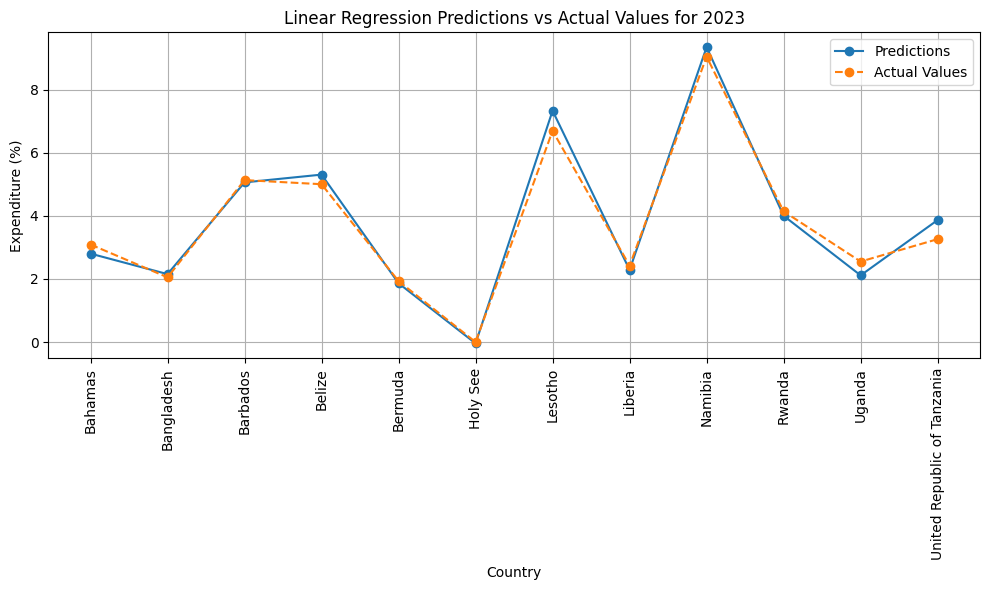

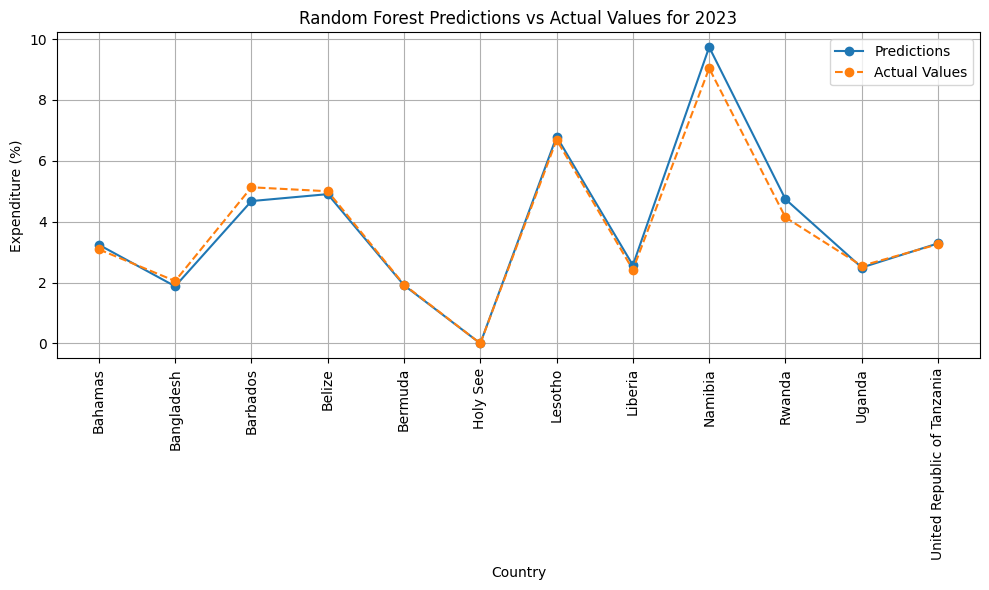

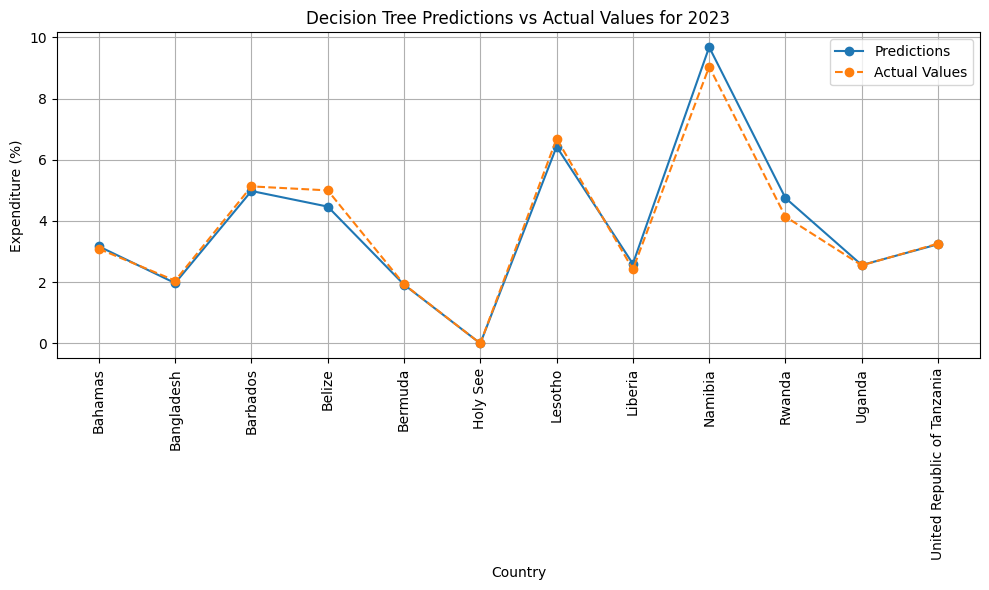

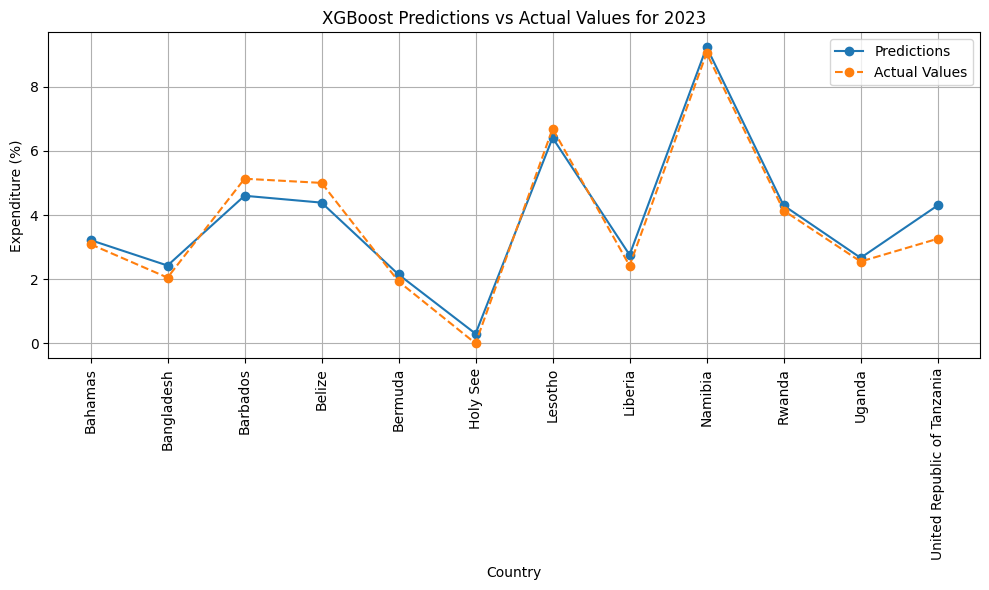

In [27]:
predictions = {
    "Linear Regression": y_pred_lr_2023,
    "Random Forest": y_pred_rf_2023,
    "Decision Tree": y_pred_dt_2023,
    "XGBoost": y_pred_xgb_2023
}

for model_name, prediction in predictions.items():
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, 13), prediction, label='Predictions', marker='o')
    plt.plot(np.arange(1, 13), actual_values_2023.values, label='Actual Values', linestyle='--', marker='o')
    plt.title(f'{model_name} Predictions vs Actual Values for 2023')
    plt.xlabel('Country')
    plt.ylabel('Expenditure (%)')
    plt.xticks(np.arange(1, 13), df_2023['Country'], rotation=90)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()